In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

shelter_data = pd.read_csv('Austin_Animal_Center_clean_data.csv')


### Converting datatypes


In [2]:
# Converting the intake and outcome data columns to datetime 

shelter_data['Intake Date'] = pd.to_datetime(shelter_data['Intake Date'])
shelter_data['Outcome Date'] = pd.to_datetime(shelter_data['Outcome Date'])
shelter_data[['Time In Shelter', 'Age at Intake', 'Age at Outcome']] = shelter_data[['Time In Shelter', 'Age at Intake', 'Age at Outcome']].apply(pd.to_timedelta)
shelter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146964 entries, 0 to 146963
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Unnamed: 0                146964 non-null  int64          
 1   Animal ID                 146964 non-null  int64          
 2   Animal                    146964 non-null  object         
 3   Intake Date               146964 non-null  datetime64[ns] 
 4   Outcome Date              146964 non-null  datetime64[ns] 
 5   Time In Shelter           146964 non-null  timedelta64[ns]
 6   Age at Intake             146964 non-null  timedelta64[ns]
 7   Age Range at Intake       146964 non-null  object         
 8   Age at Outcome            146964 non-null  timedelta64[ns]
 9   Age Range at Outcome      146964 non-null  object         
 10  Intake Condition          146964 non-null  object         
 11  Intake Type               146964 non-null  object   

In [3]:
# dropping the column unnamed 
shelter_data.drop(columns='Unnamed: 0', inplace=True)

In [4]:
# Making a copy of the data 
shelter_copy = shelter_data.copy()

### Making a copy of the data as we will need to change columns within the data, and do not want to affect the original dataset

In [5]:
# Converting the intake date and outcome date to only date values
shelter_copy['Intake Date'] = shelter_copy['Intake Date'].dt.strftime('%Y')
shelter_copy['Outcome Date'] = shelter_copy['Outcome Date'].dt.strftime('%Y')

# Time Series Analysis

## 1.1 Intake and Outcome of animals by Year

To get the intakes by year, we have to group by the intake date and use the count function 
This returns each year and the number of records we have for the year.

In [6]:
intake_by_year = shelter_copy.groupby('Intake Date')['Animal'].count()
intake_by_year

Intake Date
2013     3941
2014    17686
2015    18035
2016    16844
2017    16728
2018    16369
2019    19194
2020     9038
2021    11588
2022    11364
2023     6177
Name: Animal, dtype: int64

In [7]:
# grouping outcome date by number of outcomes each year
outcome_by_year = shelter_copy.groupby('Outcome Date')['Animal'].count()
outcome_by_year

Outcome Date
2013     3480
2014    17606
2015    17827
2016    16850
2017    16807
2018    16137
2019    19246
2020     9229
2021    11518
2022    11437
2023     6827
Name: Animal, dtype: int64

We can plot both the intakes and outcomes onto one graph and make a comparison

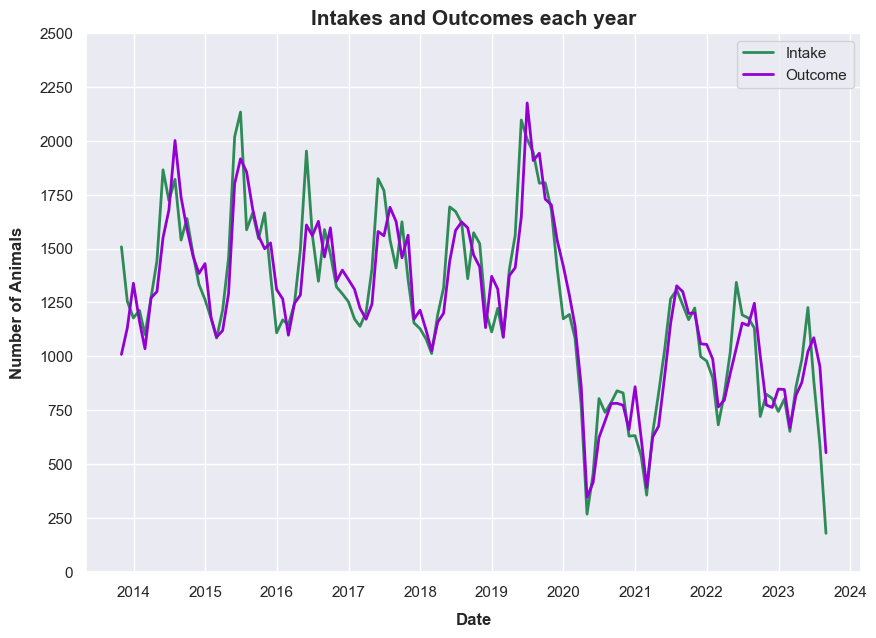

In [54]:
outcome_by_year_CS = shelter_data.resample(rule='M', on='Outcome Date')['Animal'].count()
intake_by_year_CS = shelter_data.resample(rule='M', origin='start', on='Intake Date')['Animal'].count()


plt.plot(intake_by_year_CS, color="seagreen",label="Intake", linewidth=2)
plt.plot(outcome_by_year_CS, color="darkviolet", label="Outcome", linewidth=2)

plt.yticks(np.arange(0,2750, step=250))
plt.legend(loc="best")

plt.title('Intakes and Outcomes each year', fontsize=15, fontweight='bold')
plt.xlabel('Date', fontweight='bold', labelpad=10)
plt.ylabel('Number of Animals', fontweight='bold', labelpad=10)

plt.show()

We can see from the graph above that for each year there seems to be a drop in intakes and outcomes nearing the end of the year and beginning of the new year. We can assume that this is due to the winter months but will look closer into this later on. During 2019, there was a peak in the intakes and outcomes which then had a major decrease in 2020. 

## 1.2 Analysing the intake by year

In 2013 we can see there are about 5000 data entries in terms of intakes of animals the shelter took. 
However, there was a significant increase in 2014 and the number of intakes had quadrupled. 

We can further explore this by looking at when the shelter started intaking animals in 2013.


In [9]:
# Making another copy of the data but this one will hold the intake and outcome data in a year/month format - to allow for analysis by month
shelter_copy_year_month = shelter_data.copy()
shelter_copy_year_month['Intake Date'] = shelter_copy_year_month['Intake Date'].dt.strftime('%Y-%m')
shelter_copy_year_month['Outcome Date'] = shelter_copy_year_month['Outcome Date'].dt.strftime('%Y-%m')


In [10]:
animal_intake_2013 = shelter_copy_year_month['Intake Date'].value_counts().sort_index()
animal_intake_2013 = animal_intake_2013.reset_index()

animal_intake_2013

,Intake Date,count
0,2013-10,1508
1,2013-11,1255
2,2013-12,1178
3,2014-01,1213
4,2014-02,1101
...,...,...
114,2023-04,985
115,2023-05,1226
116,2023-06,885
117,2023-07,590


## 1.3 Narrowing search to 2013 intakes via month

In [11]:
year_2013 = animal_intake_2013[animal_intake_2013['Intake Date'].str.startswith('2013')]
year_2013

,Intake Date,count
0,2013-10,1508
1,2013-11,1255
2,2013-12,1178


The animal shelter only started taking in animals in october of 2013, this explains why there was a drastic increase from 2013 to 2014. In 2013 there was only intakes for 3 months.
By looking at the dataframe above, we can see that there was a decrease in intake from October to November 2013 and another decrease from November to December.
This could be due to cold weather, however to see if this is the case, we will need to look at the overall intakes per month within the last 10 years.

## 1.4 Seasonal trend data

In [12]:
# Isolate the months in a separate column
shelter_copy_year_month['Month_Intake'] = pd.DatetimeIndex(shelter_copy_year_month['Intake Date']).month
shelter_copy_year_month['Month_Outcome'] = pd.DatetimeIndex(shelter_copy_year_month['Outcome Date']).month
shelter_copy_year_month

,Animal ID,Animal,Intake Date,Outcome Date,Time In Shelter,Age at Intake,Age Range at Intake,Age at Outcome,Age Range at Outcome,Intake Condition,...,Outcome Type,Sex,Neuter Status at Outcome,Breed,Mixed Breed,Colour,Total Touchpoints,Touchpoint Count,Month_Intake,Month_Outcome
0,664280,Dog,2013-10,2013-10,0 days 01:17:00,2192 days,5-7 yrs,2192 days,5-7 yrs,Normal,...,Return to Owner,Female,Spayed,Miniature Poodle Mix,True,Apricot,1,1,10,10
1,664286,Dog,2013-10,2013-10,6 days 02:04:00,731 days,2-3 yrs,737 days,2-3 yrs,Normal,...,Adoption,Female,Spayed,Chihuahua Shorthair Mix,True,White/Brown,1,1,10,10
2,664287,Dog,2013-10,2013-10,5 days 01:49:00,122 days,3-6 mon,127 days,3-6 mon,Normal,...,Adoption,Female,Spayed,Chihuahua Shorthair Mix,True,Brown/White,1,1,10,10
3,664288,Cat,2013-10,2013-10,0 days 02:10:00,731 days,2-3 yrs,731 days,2-3 yrs,Normal,...,Euthanasia,Male,Intact,Domestic Shorthair Mix,True,Blue/White,1,1,10,10
4,664289,Cat,2013-10,2013-10,1 days 20:38:00,92 days,3-6 mon,94 days,3-6 mon,Normal,...,Transfer,Female,Intact,Domestic Shorthair Mix,True,Brown Tabby/White,1,1,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146959,887164,Cat,2023-08,2023-08,0 days 02:51:00,1 days,0-3 mon,1 days,0-3 mon,Neonatal,...,Transfer,Unknown,Unknown,Domestic Shorthair,False,White,1,1,8,8
146960,887161,Cat,2023-08,2023-08,0 days 02:53:00,1 days,0-3 mon,1 days,0-3 mon,Neonatal,...,Transfer,Unknown,Unknown,Domestic Shorthair,False,Gray,1,1,8,8
146961,887172,Cat,2023-08,2023-08,0 days 01:55:00,7 days,0-3 mon,7 days,0-3 mon,Sick,...,Transfer,Unknown,Unknown,Domestic Shorthair,False,Gray Tabby,1,1,8,8
146962,887167,Cat,2023-08,2023-08,0 days 01:30:00,7 days,0-3 mon,7 days,0-3 mon,Sick,...,Transfer,Unknown,Unknown,Domestic Shorthair,False,Gray Tabby,1,1,8,8


In [13]:
# Define a dictionary mapping for the different seasons and use apply to add the corresponding season
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}

shelter_copy_year_month['Season_intake'] = shelter_copy_year_month['Month_Intake'].apply(lambda x: season_dict[x])
shelter_copy_year_month['Season_outcome'] = shelter_copy_year_month['Month_Outcome'].apply(lambda x: season_dict[x])
shelter_copy_year_month

,Animal ID,Animal,Intake Date,Outcome Date,Time In Shelter,Age at Intake,Age Range at Intake,Age at Outcome,Age Range at Outcome,Intake Condition,...,Neuter Status at Outcome,Breed,Mixed Breed,Colour,Total Touchpoints,Touchpoint Count,Month_Intake,Month_Outcome,Season_intake,Season_outcome
0,664280,Dog,2013-10,2013-10,0 days 01:17:00,2192 days,5-7 yrs,2192 days,5-7 yrs,Normal,...,Spayed,Miniature Poodle Mix,True,Apricot,1,1,10,10,Fall,Fall
1,664286,Dog,2013-10,2013-10,6 days 02:04:00,731 days,2-3 yrs,737 days,2-3 yrs,Normal,...,Spayed,Chihuahua Shorthair Mix,True,White/Brown,1,1,10,10,Fall,Fall
2,664287,Dog,2013-10,2013-10,5 days 01:49:00,122 days,3-6 mon,127 days,3-6 mon,Normal,...,Spayed,Chihuahua Shorthair Mix,True,Brown/White,1,1,10,10,Fall,Fall
3,664288,Cat,2013-10,2013-10,0 days 02:10:00,731 days,2-3 yrs,731 days,2-3 yrs,Normal,...,Intact,Domestic Shorthair Mix,True,Blue/White,1,1,10,10,Fall,Fall
4,664289,Cat,2013-10,2013-10,1 days 20:38:00,92 days,3-6 mon,94 days,3-6 mon,Normal,...,Intact,Domestic Shorthair Mix,True,Brown Tabby/White,1,1,10,10,Fall,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146959,887164,Cat,2023-08,2023-08,0 days 02:51:00,1 days,0-3 mon,1 days,0-3 mon,Neonatal,...,Unknown,Domestic Shorthair,False,White,1,1,8,8,Summer,Summer
146960,887161,Cat,2023-08,2023-08,0 days 02:53:00,1 days,0-3 mon,1 days,0-3 mon,Neonatal,...,Unknown,Domestic Shorthair,False,Gray,1,1,8,8,Summer,Summer
146961,887172,Cat,2023-08,2023-08,0 days 01:55:00,7 days,0-3 mon,7 days,0-3 mon,Sick,...,Unknown,Domestic Shorthair,False,Gray Tabby,1,1,8,8,Summer,Summer
146962,887167,Cat,2023-08,2023-08,0 days 01:30:00,7 days,0-3 mon,7 days,0-3 mon,Sick,...,Unknown,Domestic Shorthair,False,Gray Tabby,1,1,8,8,Summer,Summer


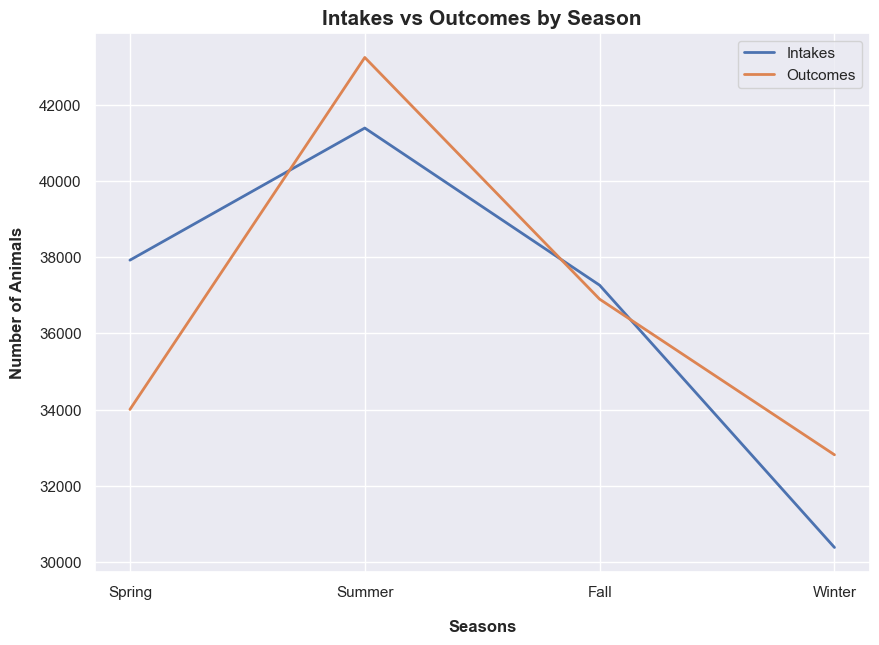

In [53]:

# Grouping by the seasons and counting the values, then changing the index to be in the order of seasons
Intake_by_season = shelter_copy_year_month.groupby('Season_intake')['Animal'].count().reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])
outcome_by_season = shelter_copy_year_month.groupby('Season_outcome')['Animal'].count().reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])

# plotting both intakes and outcomes on one graph
plt.plot(Intake_by_season, label='Intakes', linewidth=2)
plt.plot(outcome_by_season, label='Outcomes', linewidth=2)
plt.xlabel('Seasons', fontweight='bold', labelpad=15)
plt.ylabel('Number of Animals', fontweight='bold', labelpad=10)
plt.title('Intakes vs Outcomes by Season', fontweight='bold', fontsize=15)

plt.legend()
plt.show()



As expected there are fewer animals taken in by the shelter but there are also fewer animals that have outcomes in the winter. In the summer the outcomes is higher than the intake. One of the reasons for this could be that during the summer, many people go on holidays and if they have no one to care for their pet, they are most likely to drop them off at a shelter, or their pet might become a stray if they are left by themselves whilst their owners are away. Therefore, the shelter has an increase in the amount of intakes. However, there is also a rise in the number of outcomes and again this could be due to the summer holiday period as when the owners come back they may collect their pet from the shelter or the shelter may have taken in their pet due to the animal being a stray.

### Outcomes by season

In [15]:
# How many adopted in the summer
season_order= ['Spring', 'Summer', 'Fall', 'Winter']

outcomes_by_season_df = shelter_copy_year_month.groupby(['Outcome Type', 'Season_outcome'])['Animal'].count().reset_index()
outcomes_by_season_df = outcomes_by_season_df.sort_values(by='Animal', ascending=False).head(16)

outcomes_by_season_df = outcomes_by_season_df.set_index('Season_outcome')
outcomes_by_season_df

,Outcome Type,Animal
Season_outcome,,
Summer,Adoption,22065
Fall,Adoption,17631
Winter,Adoption,17364
Spring,Adoption,14410
Summer,Transfer,13554
Fall,Transfer,11403
Spring,Transfer,11232
Winter,Transfer,7860
Spring,Return to Owner,6730


In [16]:
outcome_1 = outcomes_by_season_df[outcomes_by_season_df['Outcome Type'] == 'Adoption'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])
outcome_2 = outcomes_by_season_df[outcomes_by_season_df['Outcome Type'] == 'Transfer'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])
outcome_3 = outcomes_by_season_df[outcomes_by_season_df['Outcome Type'] == 'Return to Owner'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])
outcome_4 = outcomes_by_season_df[outcomes_by_season_df['Outcome Type'] == 'Euthanasia'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])


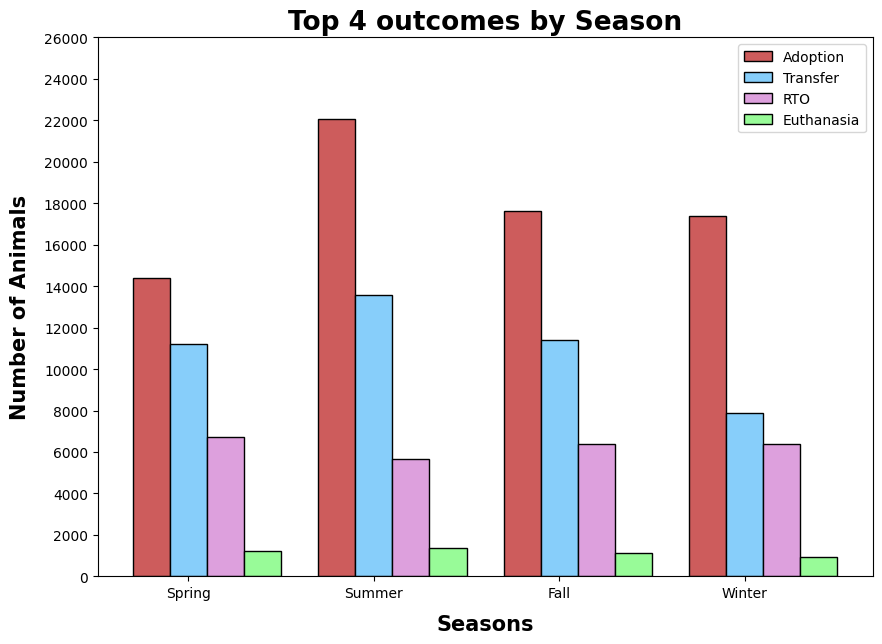

In [17]:
# Setting figure size
plt.figure(figsize=(10,7))

# turning the x and y values into a numpy array
x = np.array(outcome_1.index)

y1 = np.array(outcome_1['Animal'])
y2 = np.array(outcome_2['Animal'])
y3 = np.array(outcome_3['Animal'])
y4 = np.array(outcome_4['Animal'])

# setting width of bars
barWidth = 0.2

# setting position of bars on the x axis
r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Plotting the bars
plt.bar(r1, y1, width = barWidth, label='Adoption', edgecolor='black', color='indianred')
plt.bar(r2, y2, width = barWidth, label='Transfer', edgecolor='black', color='lightskyblue')
plt.bar(r3, y3, width = barWidth, label='RTO', edgecolor='black', color='plum')
plt.bar(r4,y4, width = barWidth, label='Euthanasia', edgecolor='black', color='palegreen')

# Adding ticks
plt.xticks([r + barWidth for r in range(len(r1))], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.yticks(np.arange(0, 27000, step=2000))

plt.xlabel('Seasons', fontsize = 15, fontweight='bold', labelpad=10)
plt.ylabel('Number of Animals', fontsize = 15, fontweight='bold', labelpad=10)
plt.title('Top 4 outcomes by Season', fontsize = 19, fontweight = 'bold')
plt.legend()
plt.show()

By looking at the top 4 outcome types of animals by season, we can see that quite a few animals are adopted in the winter but during the spring is when their are fewer animals adopted. There are also a significant amount of transfers which could be due to the increase in intakes which means the shelter does not have enough space / resources for the animals. Therefore, they have to be transferred elsewhere. 


### Types of animals adopted each season

In [18]:
# only returning data on the outcome tyoe, animal and season of outcome and then reducing the data to only include the amount of animals adopted.

animals_adopted_by_season_df = shelter_copy_year_month.value_counts(['Outcome Type', 'Season_outcome', 'Animal']).reset_index()
animals_adopted_by_season_df = animals_adopted_by_season_df[animals_adopted_by_season_df['Outcome Type'] == 'Adoption'].set_index('Season_outcome')

animals_adopted_by_season_df

,Outcome Type,Animal,count
Season_outcome,,,
Winter,Adoption,Dog,10987
Summer,Adoption,Cat,10928
Summer,Adoption,Dog,10853
Spring,Adoption,Dog,9986
Fall,Adoption,Dog,9516
Fall,Adoption,Cat,7783
Winter,Adoption,Cat,6174
Spring,Adoption,Cat,4156
Fall,Adoption,Other,254


In [19]:
# storing data for each animal in a seperate df to then use to plot graph
animal_1 = animals_adopted_by_season_df[animals_adopted_by_season_df['Animal'] == 'Dog'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])
animal_2 = animals_adopted_by_season_df[animals_adopted_by_season_df['Animal'] == 'Cat'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])
animal_3 = animals_adopted_by_season_df[animals_adopted_by_season_df['Animal'] == 'Bird'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])
animal_4 = animals_adopted_by_season_df[animals_adopted_by_season_df['Animal'] == 'Other'].reindex(index = ['Spring', 'Summer', 'Fall', 'Winter'])

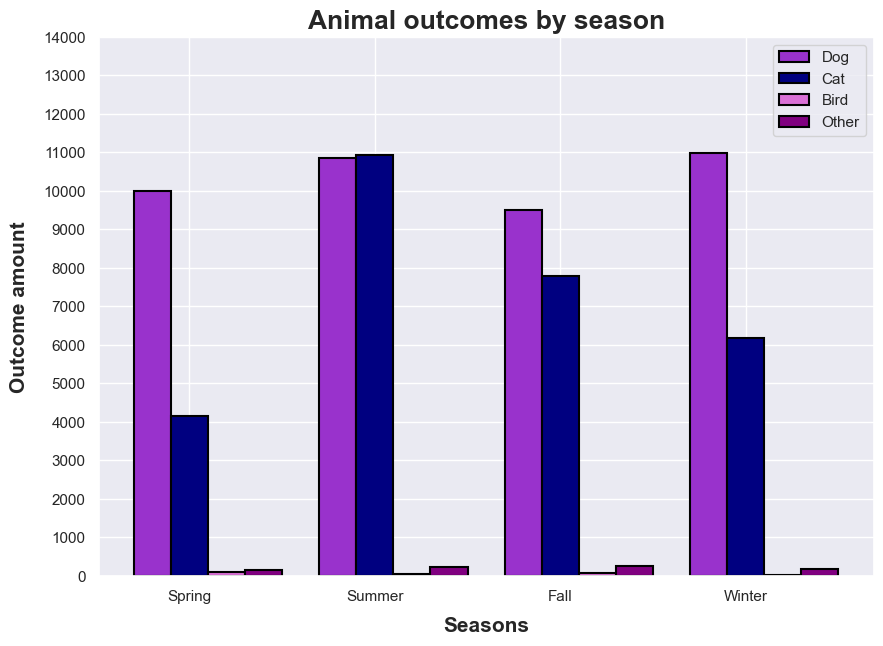

In [46]:
# turning the x and y values into a numpy array
x = np.array(animal_1.index)

y1 = np.array(animal_1['count'])
y2 = np.array(animal_2['count'])
y3 = np.array(animal_3['count'])
y4 = np.array(animal_4['count'])

# setting width of bars
barWidth = 0.2

# setting position of bars on the x axis
r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Plotting the bars
plt.bar(r1, y1, width = barWidth, label='Dog', edgecolor='black', color='darkorchid', linewidth=1.5)
plt.bar(r2, y2, width = barWidth, label='Cat', edgecolor='black', color="navy", linewidth=1.5)
plt.bar(r3, y3, width = barWidth, label='Bird', edgecolor='black', color='orchid', linewidth=1.5)
plt.bar(r4,y4, width = barWidth, label='Other', edgecolor='black', color='purple', linewidth=1.5)

# Adding ticks
plt.xticks([r + barWidth for r in range(len(r1))], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.yticks(np.arange(0, 15000, step=1000))

plt.xlabel('Seasons', fontsize = 15, fontweight='bold', labelpad=10)
plt.ylabel('Outcome amount', fontsize = 15, fontweight="bold", labelpad=10)
plt.title('Animal outcomes by season', fontsize = 19, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

From this graph we can see that dogs are adopted most during all seasons. However cats are adopted the least in spring. By Summer the number of cats adopted almost triples, this could be due to alot of kittens being born in spring and so by summer there is a higher number of cats to be adopted.

## 1.5 Average Monthly intakes and outcomes

In [21]:
shelter_copy_year_month = shelter_copy_year_month

monthly_intakes = shelter_copy_year_month.groupby('Month_Intake')['Animal'].count().reset_index()
monthly_outcomes = shelter_copy_year_month.groupby('Month_Outcome')['Animal'].count().reset_index()

avg_intake_months = np.array(monthly_intakes['Animal'] / sum(monthly_intakes['Animal']))
avg_outcome_months = np.array(monthly_outcomes['Animal'] / sum(monthly_outcomes['Animal']))

In [22]:
import calendar

# Converting intake and outcome months to word 
monthly_intakes['Month_Intake']= monthly_intakes['Month_Intake'].apply(lambda x: calendar.month_name[x])
monthly_outcomes['Month_Outcome']= monthly_outcomes['Month_Outcome'].apply(lambda x: calendar.month_name[x])
monthly_intakes

,Month_Intake,Animal
0,January,10467
1,February,9347
2,March,10638
3,April,11780
4,May,15505
5,June,15014
6,July,13676
7,August,12699
8,September,12392
9,October,13407


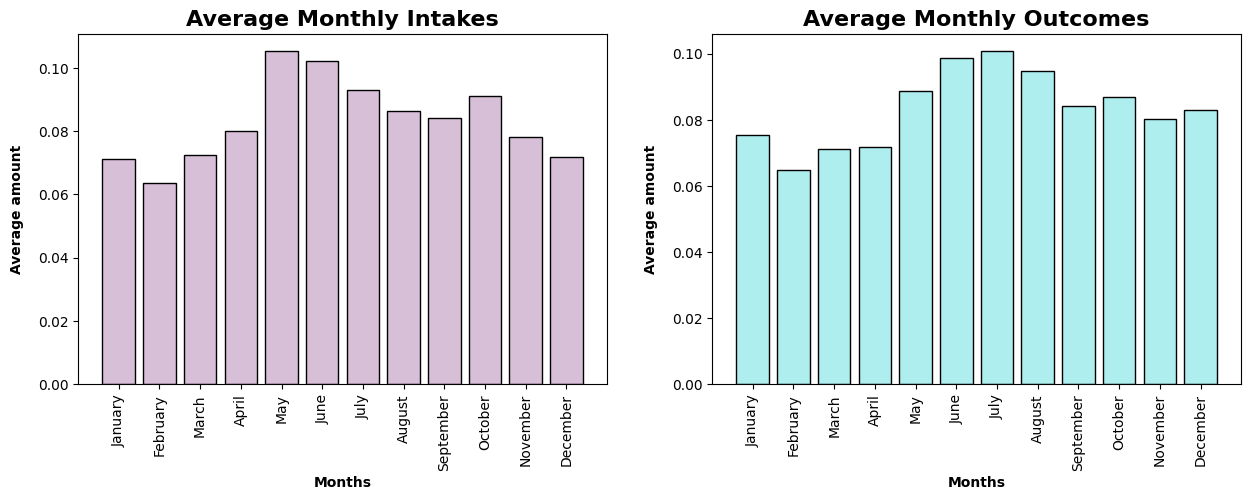

In [23]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.bar(monthly_intakes['Month_Intake'], avg_intake_months, color="thistle", edgecolor='black')
plt.title('Average Monthly Intakes', fontsize=16, fontweight='bold')
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Average amount', fontweight='bold', labelpad=10)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.bar(monthly_outcomes['Month_Outcome'], avg_outcome_months, color="paleturquoise", edgecolor='black')
plt.title('Average Monthly Outcomes', fontsize=16, fontweight='bold')
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Average amount', fontweight='bold', labelpad=10)
plt.xticks(rotation=90)
plt.show()

As we can see the number of intakes by the shelter does decrease during the winter months but mainly in February which has the least amount of intakes. However, as February is the shortest month, this could be another reason for the lower average intakes. This also applies to the outcomes, where there are less outcomes in February. 
In may we see an increase in the intakes and outcomes. However, during the summer months there outcomes stay quite high.

# Animal outcomes by Month

In [24]:
monthly_outcome_types = shelter_copy_year_month.groupby(['Month_Outcome', 'Outcome Type'])['Animal'].count().reset_index()

# Converting intake and outcome months to word 
monthly_outcome_types['Month_Outcome']= monthly_outcome_types['Month_Outcome'].apply(lambda x: calendar.month_name[x])
monthly_outcome_types

,Month_Outcome,Outcome Type,Animal
0,January,Adoption,5798
1,January,Died,78
2,January,Euthanasia,295
3,January,Missing,4
4,January,Return to Owner,2234
...,...,...,...
76,December,Died,94
77,December,Euthanasia,331
78,December,Missing,7
79,December,Return to Owner,2235


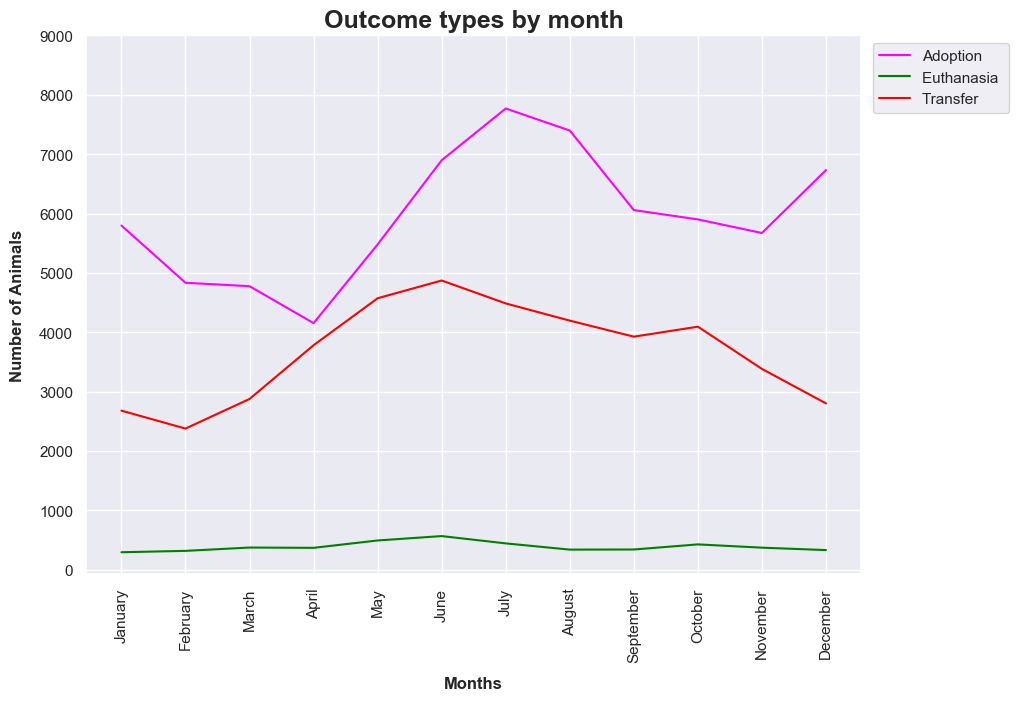

In [52]:
# plotting outcome types by month

outcome_adoption = monthly_outcome_types[monthly_outcome_types['Outcome Type'] == 'Adoption']
outcome_euthanasia = monthly_outcome_types[monthly_outcome_types['Outcome Type'] == 'Euthanasia']
outcome_transfer = monthly_outcome_types[monthly_outcome_types['Outcome Type'] == 'Transfer']

plt.plot(outcome_adoption['Month_Outcome'], outcome_adoption['Animal'], color="magenta",label="Adoption")
plt.plot(outcome_euthanasia['Month_Outcome'], outcome_euthanasia['Animal'], color="green", label="Euthanasia ")
plt.plot(outcome_transfer['Month_Outcome'], outcome_transfer['Animal'], color="red", label="Transfer ")

plt.xticks(rotation=90)
plt.yticks(np.arange(0, 10000, step=1000))

plt.title('Outcome types by month', fontweight='bold', fontsize=18)
plt.xlabel('Months', fontweight='bold', labelpad=10)
plt.ylabel('Number of Animals', fontweight='bold', labelpad=10)

plt.legend(loc="best", bbox_to_anchor=(1.2,1))
plt.show()

In april there is a dip in the amount of adoptions whereas transfer is on the rise. The reasons for the increase in transfers may be due to the shelter having an influx on intakes and as they are unable to manage the intake amount, animals have to be transferred. Also when the adoption rates drop, we can see an increase in the transfers. 

## 1.6 Covid period

We had also noticed that the intakea and outcomes of animals had a significant drop from 2019 to 2020.
We know this was during the period of covid which could mean that as people had to spend majority of their days at home, they had time to care for their pets which meant the animal shelter would have had to take in less animals.


### Intakes per animal per year
We will first need to count the values of the intake date and animal columns in order to show how many intakes their where for each animal over the years

In [26]:
intake_animals = shelter_copy[['Intake Date', 'Animal']].value_counts().sort_index()
intake_animals = intake_animals.reset_index()

intake_animals.head()


,Intake Date,Animal,count
0,2013,Bird,5
1,2013,Cat,1287
2,2013,Dog,2611
3,2013,Other,38
4,2014,Bird,49


### Outcomes per animal per year

In [27]:
outcome_animals = shelter_copy[['Outcome Date', 'Animal']].value_counts().sort_index()
outcome_animals = outcome_animals.reset_index()

outcome_animals.head()

,Outcome Date,Animal,count
0,2013,Bird,5
1,2013,Cat,1167
2,2013,Dog,2272
3,2013,Other,36
4,2014,Bird,49


### Narrowing down search to 2019 and 2020

We can now specify the date we need which is 2019 and 2020 as we want to see if there was a decrease in the number of animals that were taken in by the shelter during the years of covid

In [28]:
intake_years_2019 = intake_animals[intake_animals['Intake Date']=='2019']
intake_years_2020 = intake_animals[intake_animals['Intake Date']=='2020']
print(intake_years_2019)
print(intake_years_2020)

   Intake Date Animal  count
24        2019   Bird     81
25        2019    Cat   7852
26        2019    Dog  10911
27        2019  Other    350
   Intake Date Animal  count
28        2020   Bird     35
29        2020    Cat   3443
30        2020    Dog   5394
31        2020  Other    166


In [29]:
outcome_years_2019 = outcome_animals[outcome_animals['Outcome Date']=='2019']
outcome_years_2020 = outcome_animals[outcome_animals['Outcome Date']=='2020']
print(outcome_years_2019)
print(outcome_years_2020)

   Outcome Date Animal  count
24         2019   Bird     81
25         2019    Cat   7739
26         2019    Dog  11075
27         2019  Other    351
   Outcome Date Animal  count
28         2020   Bird     35
29         2020    Cat   3515
30         2020    Dog   5504
31         2020  Other    175


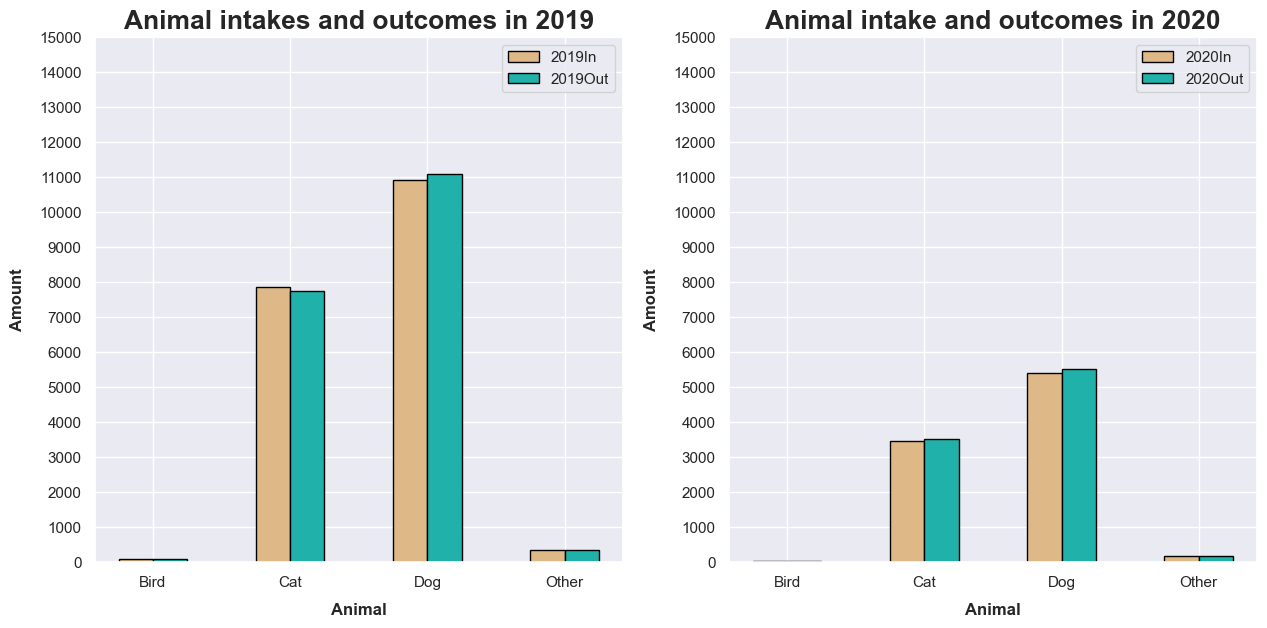

In [51]:
# plotting graphs to compare intake and outcomes in 2019 and 2020

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.bar(intake_years_2019['Animal'], intake_years_2019['count'], width=-0.25, align='edge', label='2019In', edgecolor='black', color='burlywood')
plt.bar(outcome_years_2019['Animal'], outcome_years_2019['count'], width=0.25, align='edge', label='2019Out', edgecolor='black', color='lightseagreen')
plt.xlabel('Animal', fontweight='bold', labelpad=10)
plt.ylabel('Amount', fontweight='bold', labelpad=10)
plt.title('Animal intakes and outcomes in 2019', fontweight='bold', fontsize=19)
plt.yticks(np.arange(0, 16000, step=1000))
plt.legend()

plt.subplot(2,2,2)
plt.bar(intake_years_2020['Animal'], intake_years_2020['count'], width=-0.25, align='edge', label='2020In', color='burlywood', edgecolor='black' )
plt.bar(outcome_years_2020['Animal'], outcome_years_2020['count'], width=0.25, align='edge', label='2020Out', color='lightseagreen', edgecolor='black')
plt.xlabel('Animal', fontweight='bold', labelpad=10)
plt.ylabel('Amount', fontweight='bold', labelpad=10)
plt.title('Animal intake and outcomes in 2020', fontweight='bold', fontsize=19)
plt.yticks(np.arange(0, 16000, step=1000))
plt.legend()

plt.show()


The subplots show that in 2019, there were more dogs that had an outcome than intakes. Whereas in 2020, both cats and dogs had a slightly higher outcome than intake. 
To be certain that these outcomes were mainly adoptions, we will analyse the adoption rate in 2019 and 2020. 


## Analysing adoption outcome during covid

We can see that from 2019 to 2020, there was a major decrease in the outcomes, this may have been due to the decreased intakes during the period, and so outcomes where just as less. 
From this, we can look at the outcome type column to check how many of the animals were adopted during the covid period.

In [31]:
# Grouping by outcome date and outcome type

outcome_animal_types = shelter_copy[['Outcome Date', 'Outcome Type']].value_counts().sort_index()
outcome_animal_types = outcome_animal_types.reset_index()

outcome_animal_types.head(7)

,Outcome Date,Outcome Type,count
0,2013,Adoption,1304
1,2013,Died,16
2,2013,Euthanasia,255
3,2013,Missing,2
4,2013,Return to Owner,702
5,2013,Transfer,1201
6,2014,Adoption,6971


In [32]:
# Narrowing down to look at data for 2019 and 2020

outcome_type_2019_2020 = outcome_animal_types[outcome_animal_types['Outcome Date'].isin(['2019', '2020'])]

outcome_type_2019_2020.head(2)

,Outcome Date,Outcome Type,count
39,2019,Adoption,9411
40,2019,Died,258


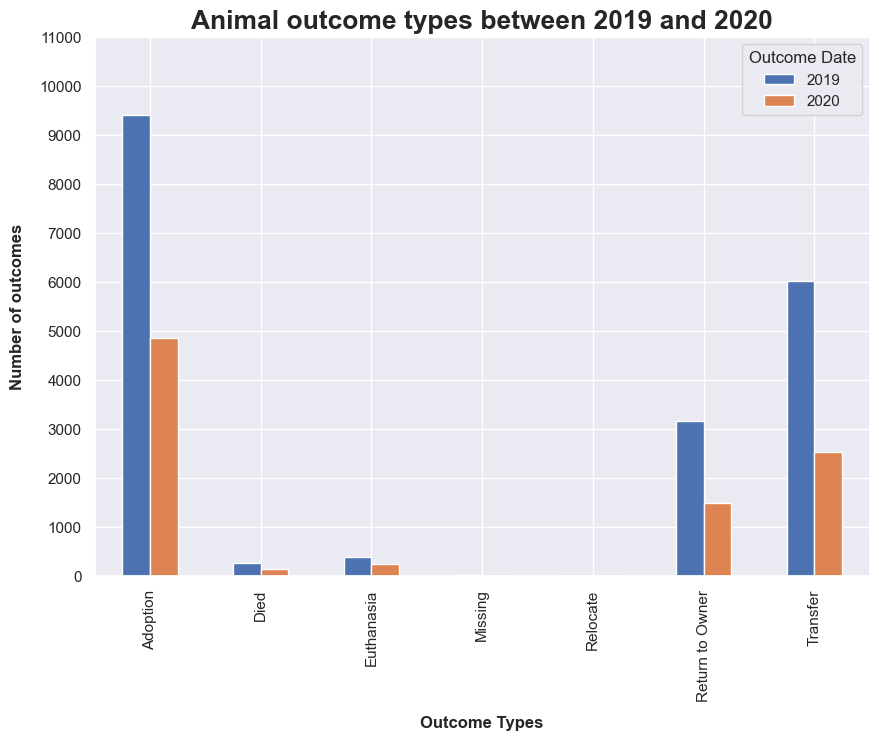

In [50]:
outcome_type_2019_2020.pivot(index="Outcome Type", columns="Outcome Date", values="count").plot(kind="bar")
plt.xlabel('Outcome Types', fontweight='bold', labelpad=10)
plt.ylabel('Number of outcomes', fontweight='bold', labelpad=10)
plt.title('Animal outcome types between 2019 and 2020',fontweight='bold', fontsize=19)
plt.yticks(np.arange(0, 12000, step=1000))
plt.show()

In 2019, there was a higher adoptionrate by almost double the amount of adoptions that took place in 2020. However, we can argue that due to the reduce amount of outcomes in 2020, the adoption rates aren't as low as expected as from all the other outcome types, adoptions was still the highest in 2020. 
However, there were still a significant amount of animals that were transferred in both 2019 and 2020. 

## 1.7 Comparison of the number of intakes vs the adoption rates each year

Adoption rate per year

In [34]:
outcome_adoption = shelter_copy[shelter_copy['Outcome Type'] == 'Adoption']


adoption_by_year = outcome_adoption.groupby('Intake Date', as_index=False)['Animal'].count()
adoption_by_year

,Intake Date,Animal
0,2013,1628
1,2014,7055
2,2015,7492
3,2016,8103
4,2017,8000
5,2018,8130
6,2019,9346
7,2020,4708
8,2021,6899
9,2022,6682


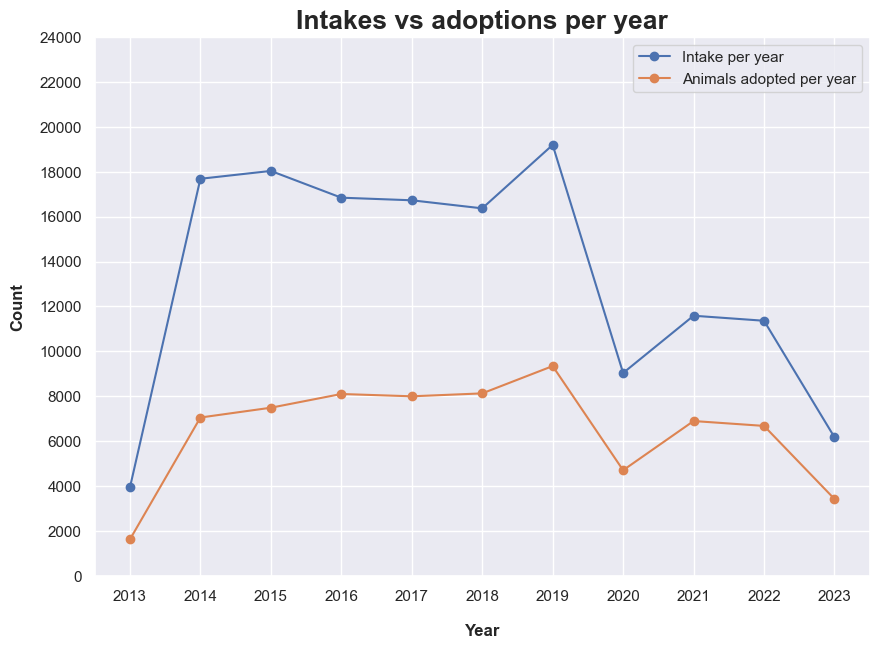

In [49]:
# Using values from intake by year dataframe created in 1.1
x_val_intake = intake_by_year.index
y_val_intake = intake_by_year

# Setting values to the correct x and y axis to use when plotting
x_val_adopt = adoption_by_year['Intake Date']
y_val_adopt = adoption_by_year['Animal']

plt.plot(x_val_intake, y_val_intake, '-o', label='Intake per year')
plt.plot(x_val_adopt, y_val_adopt, '-o' , label='Animals adopted per year')

plt.title('Intakes vs adoptions per year', fontweight='bold', fontsize=19)
plt.xlabel('Year', fontweight='bold', labelpad=15)
plt.ylabel('Count', fontweight='bold', labelpad=10)

plt.yticks(np.arange(0, 25000, step=2000))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

The graph above shows the adoption rate compared to the intakes per year. There was a steady increase in the adoption rates between 2014 and 2018. In 2019 the adoption rates increased but not as much as the intakes. 
From 2019 to 2020, there was a decrease in the adoption rates but this is due to the major decrease in intakes. However, despite this there is still a big gap between the number of intakes and the adoption rates. 
Therefore we will compare each outcome type for each year with the intakes per year, to see whether the adoption rate was the highest amongst all outcome types or not.

In [36]:
# Seeing all the outcome types 

outcome_types = shelter_copy.groupby(['Outcome Type'], as_index=False)['Animal'].count()
outcome_types


,Outcome Type,Animal
0,Adoption,71470
1,Died,1524
2,Euthanasia,4670
3,Missing,74
4,Relocate,12
5,Return to Owner,25160
6,Stolen,5
7,Transfer,44049


From the outcome types count, we can see that aside from adoption, the other outcomes with high values are euthanasia, return to owner and transfer.
Therefore we will just look into this data

## 1.8 Comparison between intakes vs outcome types

In [37]:
outcome_died = shelter_copy.query("`Outcome Type` == 'Died'").groupby('Intake Date')['Animal'].count().to_list()
outcome_died

[20, 105, 154, 190, 149, 168, 261, 133, 149, 115, 80]

In [38]:
# Grouping by Euthanasia
outcome_euthanasia = shelter_copy.query("`Outcome Type` == 'Euthanasia'").groupby('Intake Date')['Animal'].count().to_list()
outcome_euthanasia

[269, 1090, 907, 469, 374, 295, 390, 241, 259, 253, 123]

In [39]:
outcome_rto = shelter_copy.query("`Outcome Type` == 'Return to Owner'").groupby('Intake Date')['Animal'].count().to_list()
outcome_rto

[735, 3286, 3493, 3298, 3338, 3147, 3149, 1480, 1357, 1271, 606]

In [40]:
outcome_transfer = shelter_copy.query("`Outcome Type` == 'Transfer'").groupby('Intake Date')['Animal'].count().to_list()
outcome_transfer

[1287, 6146, 5970, 4769, 4858, 4622, 6035, 2473, 2916, 3038, 1935]

### Graph to show intakes per year vs each outcome type per year

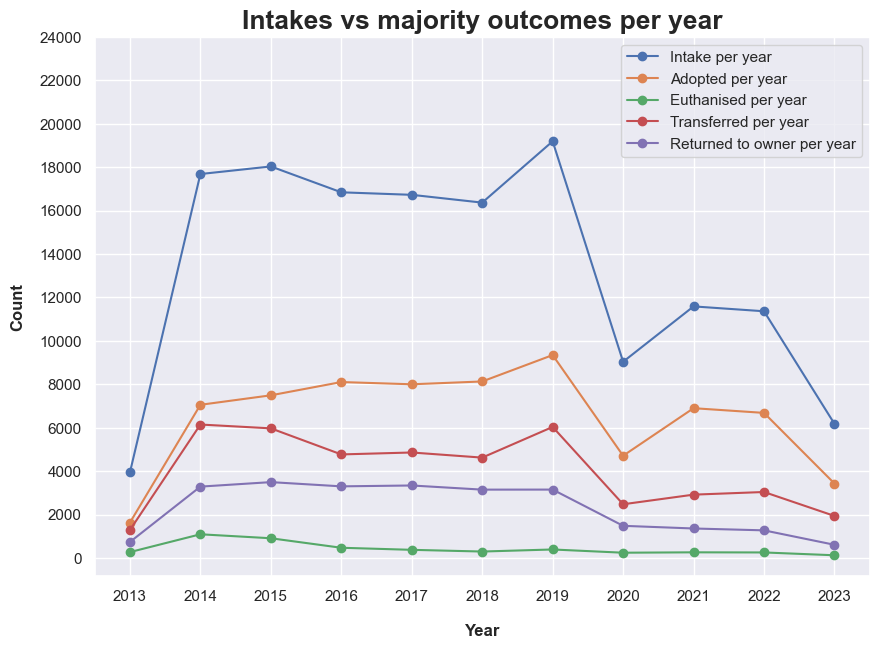

In [48]:
x_val_year = intake_by_year.index
y_val_intake = intake_by_year

# Setting values to the correct x and y axis to use when plotting

plt.plot(x_val_year, y_val_intake, '-o', label='Intake per year')
plt.plot(x_val_year, y_val_adopt, '-o' , label='Adopted per year')
plt.plot(x_val_year, outcome_euthanasia, '-o' , label='Euthanised per year')
plt.plot(x_val_year, outcome_transfer, '-o' , label='Transferred per year')
plt.plot(x_val_year, outcome_rto, '-o' , label='Returned to owner per year')

plt.title('Intakes vs majority outcomes per year', fontsize=19, fontweight='bold')
plt.xlabel('Year', fontweight='bold', labelpad=15)
plt.ylabel('Count', fontweight='bold', labelpad=10)
plt.yticks(np.arange(0, 25000, step=2000))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

As expected the adoption rates has been the highest each year, however, the number of transfers is higher than expected. As we can see the overall intakes is very high, this means the animals that do not get adopted or aren't returned to their owner, will end up getting transferred. This may be due to insufficient space in the austin shelter to keep all the animals that are taken in. 

## 1.9 Mean duration an animal stays at the shelter 

Here we will look at the mean time an animal stays in the shleter depending on their age group and the type of animal

In [42]:
shelter_copy['Days in Shelter'] = shelter_copy['Time In Shelter'].dt.days

# Using for loop to loop through each row in the 'Days in Shelter' column to turn the value into an integer
for i in shelter_copy['Days in Shelter']:
    i = int(i)

# Checking that the row is now of int datatype
shelter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146964 entries, 0 to 146963
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Animal ID                 146964 non-null  int64          
 1   Animal                    146964 non-null  object         
 2   Intake Date               146964 non-null  object         
 3   Outcome Date              146964 non-null  object         
 4   Time In Shelter           146964 non-null  timedelta64[ns]
 5   Age at Intake             146964 non-null  timedelta64[ns]
 6   Age Range at Intake       146964 non-null  object         
 7   Age at Outcome            146964 non-null  timedelta64[ns]
 8   Age Range at Outcome      146964 non-null  object         
 9   Intake Condition          146964 non-null  object         
 10  Intake Type               146964 non-null  object         
 11  Outcome Type              146964 non-null  object   

In [43]:
animal_shelter_time = shelter_copy.groupby(['Animal', 
                                      'Age Range at Intake'])['Days in Shelter'].mean().reset_index()

animal_shelter_time.head(3)

,Animal,Age Range at Intake,Days in Shelter
0,Bird,0-3 mon,3.258065
1,Bird,1-2 yrs,11.388316
2,Bird,10-13 yrs,9.000000


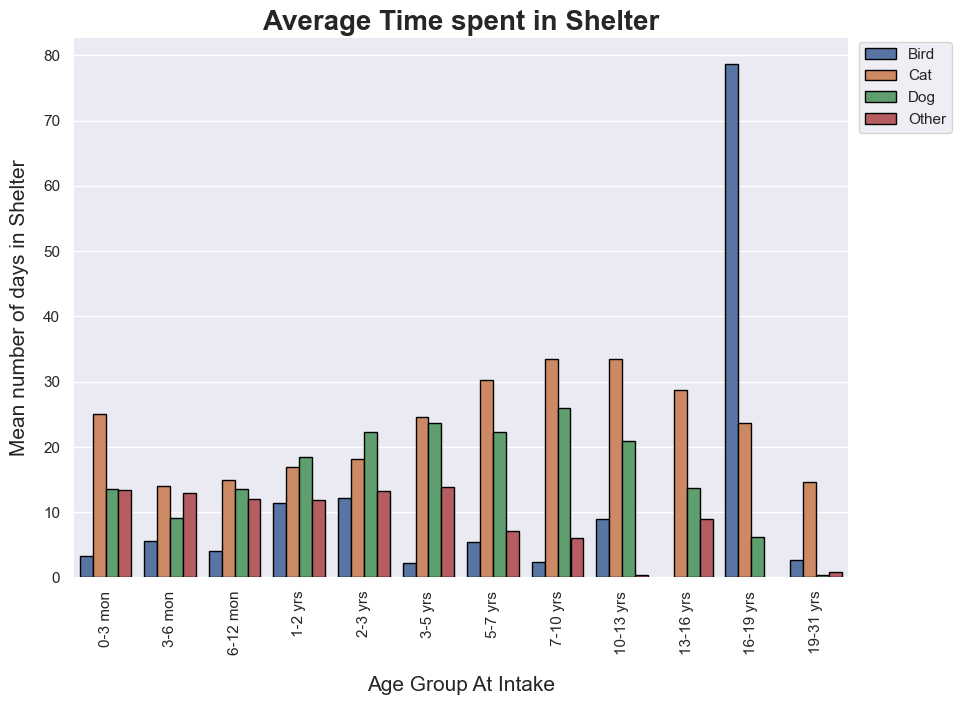

In [47]:
import seaborn as sns


age_order = ['0-3 mon', '3-6 mon', '6-12 mon', '1-2 yrs', '2-3 yrs', '3-5 yrs', '5-7 yrs', '7-10 yrs', '10-13 yrs', '13-16 yrs', '16-19 yrs', '19-31 yrs']

bar = sns.barplot(x='Age Range at Intake', y='Days in Shelter', 
                  hue='Animal', data=animal_shelter_time, order=age_order, edgecolor='black')

bar.set_title('Average Time spent in Shelter', fontsize=20, fontweight='bold')
bar.set_ylabel('Mean number of days in Shelter', fontsize=15, labelpad=10)
bar.set_xlabel('Age Group At Intake', fontsize=15, labelpad=15)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
sns.set(rc={"figure.figsize": (10,7)})
sns.despine(bottom=True)

plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.2)
plt.show()


Dogs stay in the shelter longer than any other animal. Between the ages of 3-5 years, there are more dogs that stay in the shleter compared to any other animal. Howeverm between the ages of 10-31yrs, the amount of dogs comapred to the other animals is significantly less. This could be because the shelter does not have an increased amount on intakes for dogs aboce 10yrs.
We can also see that cats and dogs between the age of 0-3months spend alot of time in the shelter, this could be because they are too young to be adopted. 


### 1.9.1 Overall intakes per age group vs dog intakes per age group

In [45]:
# checking the amount of intakes overall for each age group and the amount of intakes for dogs per intake
print(shelter_copy['Age Range at Intake'].value_counts())
print(shelter_copy.loc[shelter_copy['Animal'] == 'Dog']['Age Range at Intake'].value_counts())

Age Range at Intake
0-3 mon      43680
2-3 yrs      23986
1-2 yrs      22920
3-6 mon      12611
3-5 yrs      12125
6-12 mon     11289
5-7 yrs       8062
7-10 yrs      6499
10-13 yrs     3929
13-16 yrs     1516
16-19 yrs      288
19-31 yrs       59
Name: count, dtype: int64
Age Range at Intake
2-3 yrs      17271
1-2 yrs      15452
0-3 mon      12954
3-5 yrs       9514
6-12 mon      8009
3-6 mon       6648
5-7 yrs       6217
7-10 yrs      4962
10-13 yrs     2782
13-16 yrs     1008
16-19 yrs      170
19-31 yrs       21
Name: count, dtype: int64


Looking at the overall amount of intakes per age group vs the amount of dogs per age group, we can see about half of these intakes are for dogs. 
This explains why there are a significantly higher amount of dogs that spend more time in the shelter, as majority of the intakes are for Dogs. 